### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_islamic_country_languages_stanford_standards import islamic_country_languages_word_list_for_word2vec as word_list_ln_dict
MODEL_DIR = '../../word_embeddings/islamic_countries_ln_word_vectors/word2vec/'

### load male, female & professional occupation wordlist

In [2]:
def remove_common_words_in_reference_group(group_1, group_2):
    group_1 = list(set(group_1))
    group_2 = list(set(group_2))
    for index_1, word_1 in enumerate(group_1):
        for index_2, word_2 in enumerate(group_2):
            if word_1 == word_2:
                group_1.pop(index_1)
                group_2.pop(index_2)
                break
    return group_1, group_2

def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = word_list_ln_dict[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = word_list_ln_dict['en']['pr_occupations']
    MALE_WORDS = word_list_ln_dict[lang]['male_words']
    FEMALE_WORDS = word_list_ln_dict[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    MALE_WORDS, FEMALE_WORDS = remove_common_words_in_reference_group(MALE_WORDS, FEMALE_WORDS)
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations


target group -->
professional_occupation ['بواب', 'إحصائي', 'قابلة', 'مأمور', 'بائع مزاد', 'مصور', 'جيولوجي', 'صانع أحذية', 'رياضي', 'أمين صندوق', 'راقصة', 'مدبرة منزل', 'محاسب', 'فيزيائي', 'بستاني', 'طبيب أسنان', 'ويفر', 'حداد', 'طبيب نفساني', 'مشرف', 'عالم رياضيات', 'مساح', 'خياط', 'مصمم', 'اقتصادي', 'ميكانيكي', 'عامل', 'مدير مكتب بريد', 'وسيط', 'كيميائي', 'أمين مكتبة', 'خادم', 'رجال دين', 'موسيقي', 'بورتر', 'عالم', 'نجار', 'بحار', 'مدرب', 'شريف', 'طيار', 'مفتش', 'ميسون', 'خباز', 'مسؤول', 'مهندس معماري', 'جامع', 'عامل', 'جراح', 'سائق', 'رسام', 'موصل', 'ممرضة', 'كوك', 'مهندس', 'متقاعد', 'مبيعات', 'محام', 'رجال دين', 'طبيب', 'مزارع', 'كاتب', 'مدير', 'حارس', 'فنان', 'سميث', 'مسؤول', 'شرطة', 'طبيب', 'أستاذ', 'طالب', 'قاضي', 'معلم', 'كاتب', 'سكرتير', 'جندي']




reference group -->
male ['الأعمام', 'الرجال', 'أب', 'له', 'رجل', 'نفسه', 'أخ', 'الإخوة', 'ذكر', 'الأولاد', 'العم', 'ابن أخي', 'ابن', 'الذكور', 'هو', 'أبناء', 'آباء', 'أبناء أخي', 'فتى']


female ['لها', 'هي', 'ابنة', 'رجال', 'أمه

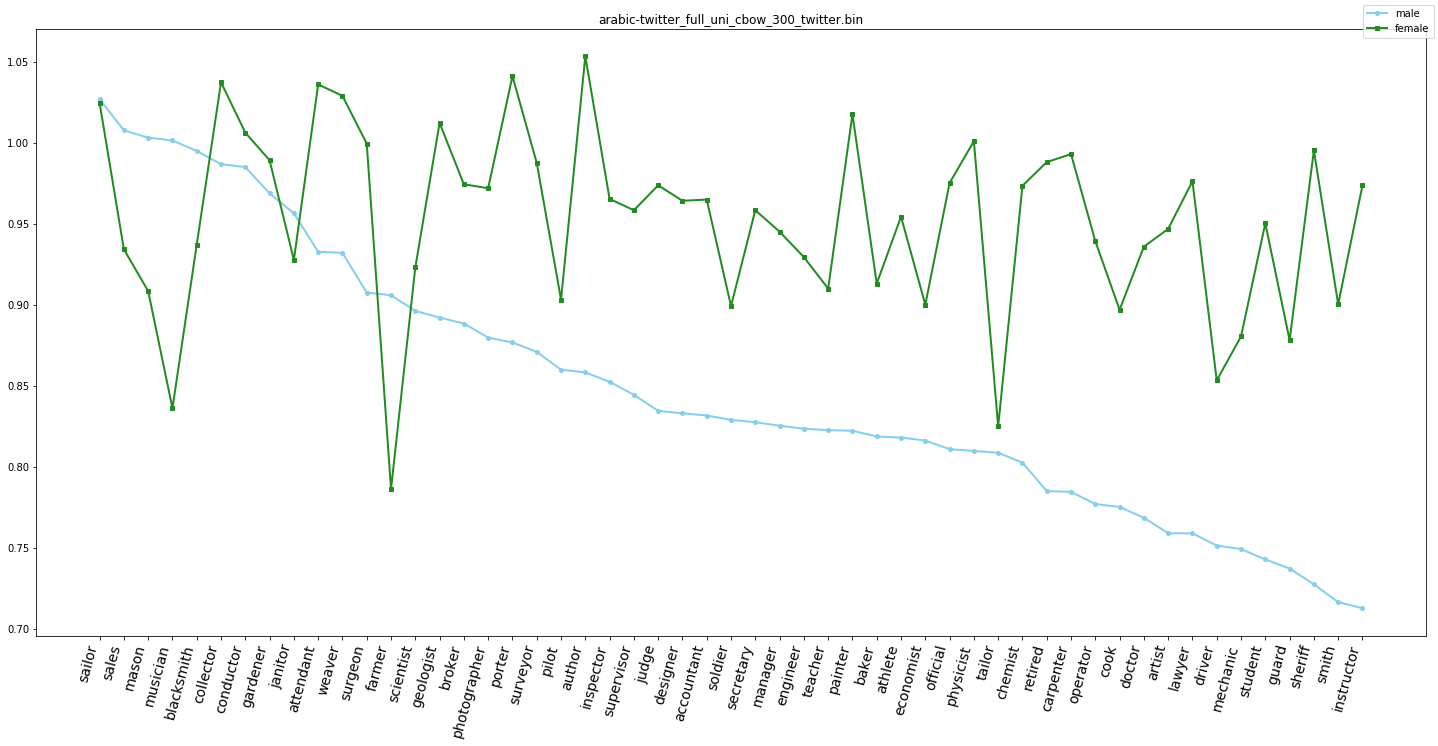

total 36 missing words for this embedding {'صانع أحذية', 'أخ', 'ابن أخي', 'شرطة', 'الأولاد', 'قابلة', 'بائع مزاد', 'طبيب أسنان', 'طبيب نفساني', 'فتاة', 'الأعمام', 'راقصة', 'ابنة', 'أبناء أخي', 'أمهات', 'أخوات', 'إحصائي', 'رجال دين', 'أمين صندوق', 'أب', 'الإخوة', 'عالم رياضيات', 'أم', 'أبناء', 'مأمور', 'مهندس معماري', 'فتى', 'أخت', 'أنثى', 'مدير مكتب بريد', 'أستاذ', 'مدبرة منزل', 'أمين مكتبة', 'ممرضة', 'آباء', 'امرأة'}



target group -->
professional_occupation ['بواب', 'إحصائي', 'قابلة', 'مأمور', 'بائع مزاد', 'مصور', 'جيولوجي', 'صانع أحذية', 'رياضي', 'أمين صندوق', 'راقصة', 'مدبرة منزل', 'محاسب', 'فيزيائي', 'بستاني', 'طبيب أسنان', 'ويفر', 'حداد', 'طبيب نفساني', 'مشرف', 'عالم رياضيات', 'مساح', 'خياط', 'مصمم', 'اقتصادي', 'ميكانيكي', 'عامل', 'مدير مكتب بريد', 'وسيط', 'كيميائي', 'أمين مكتبة', 'خادم', 'رجال دين', 'موسيقي', 'بورتر', 'عالم', 'نجار', 'بحار', 'مدرب', 'شريف', 'طيار', 'مفتش', 'ميسون', 'خباز', 'مسؤول', 'مهندس معماري', 'جامع', 'عامل', 'جراح', 'سائق', 'رسام', 'موصل', 'ممرضة', 'كوك',

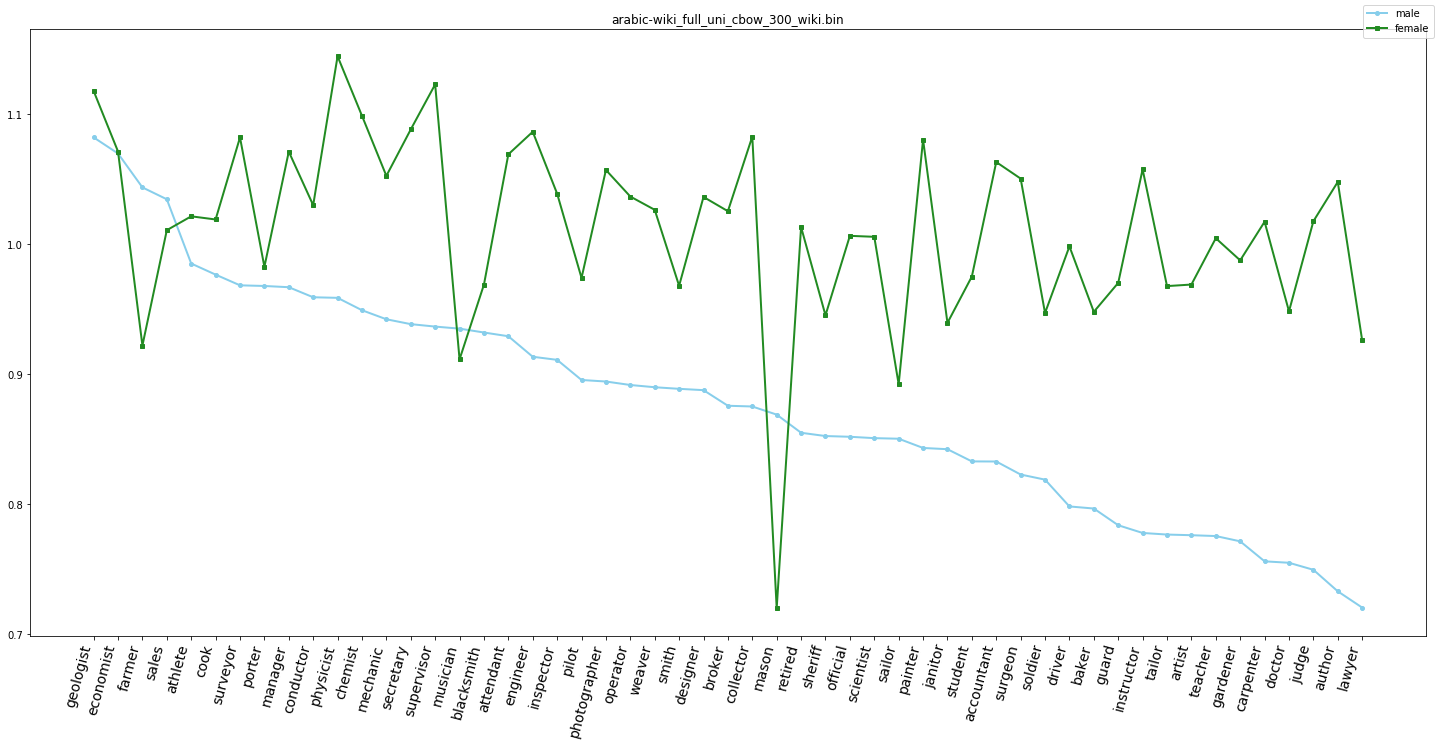

total 36 missing words for this embedding {'صانع أحذية', 'أخ', 'ابن أخي', 'شرطة', 'الأولاد', 'قابلة', 'بائع مزاد', 'طبيب أسنان', 'طبيب نفساني', 'فتاة', 'الأعمام', 'راقصة', 'ابنة', 'أبناء أخي', 'أمهات', 'أخوات', 'إحصائي', 'رجال دين', 'أمين صندوق', 'أب', 'الإخوة', 'عالم رياضيات', 'أم', 'أبناء', 'مأمور', 'مهندس معماري', 'فتى', 'أخت', 'أنثى', 'مدير مكتب بريد', 'أستاذ', 'مدبرة منزل', 'أمين مكتبة', 'ممرضة', 'آباء', 'امرأة'}



target group -->
professional_occupation ['দারোয়ান', 'পরিসংখ্যানবিদ', 'মিডওয়াইফ', 'বেলিফ', 'নিলাম', 'ফটোগ্রাফার', 'ভূতত্ত্ববিদ', 'জুতো প্রস্তুতকারক', 'অ্যাথলেট', 'ক্যাশিয়ার', 'নর্তকী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'উদ্যানবিদ', 'দাঁতের', 'তাঁতি', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'যান্ত্রিক', 'শ্রমিক', 'পোস্টমাস্টার', 'ব্রোকার', 'রসায়নবিদ', 'গ্রন্থাগারিক', 'পরিচারক', 'কেরানি', 'সুরকার', 'কুলি', 'বিজ্ঞানী', 'ছুতার', 'নাবিক', 'প্রশিক্ষক', 'শেরিফ', 'পাইলট', 'পরিদর্শক', 'রাজমিস্ত্রি', 'বেকার', 'প

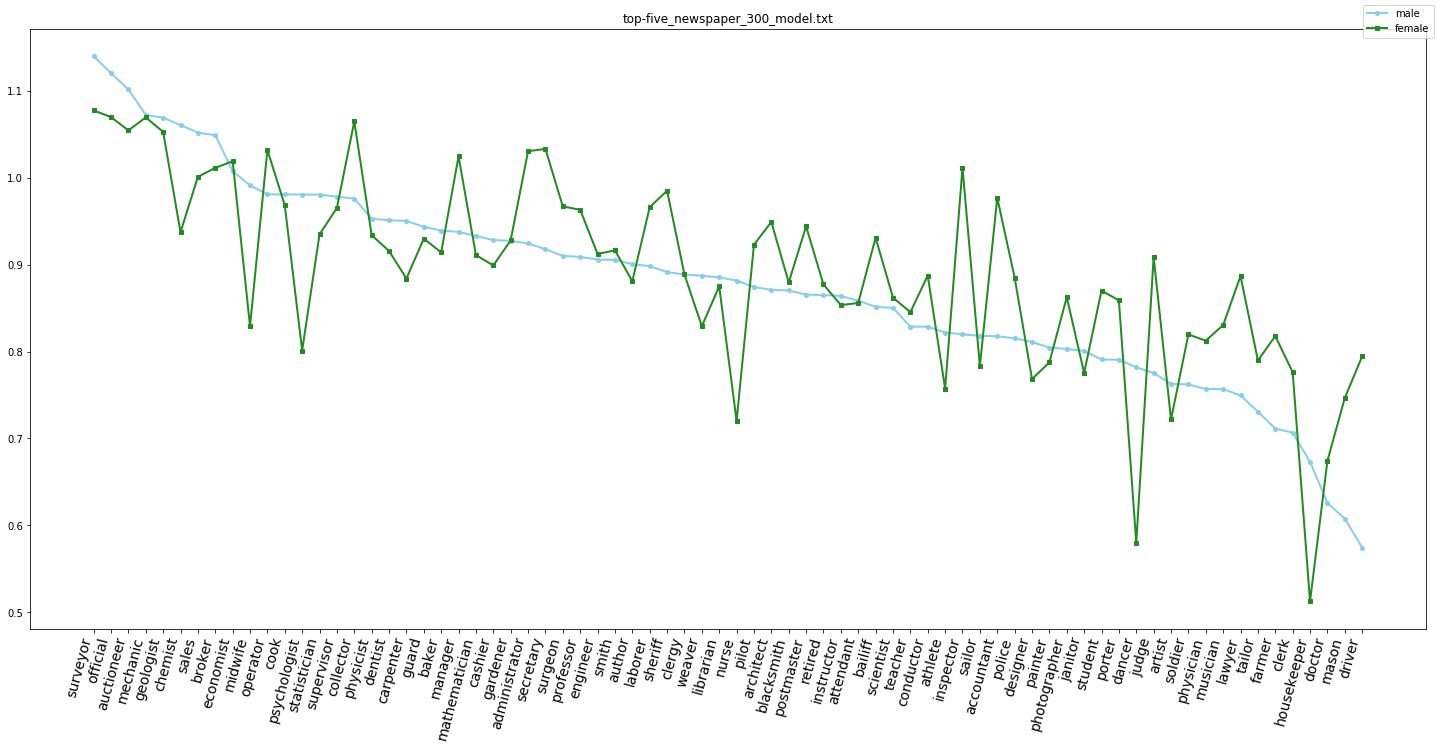

total 1 missing words for this embedding {'জুতো প্রস্তুতকারক'}



target group -->
professional_occupation ['جینیٹر', 'شماریات دان', 'دایہ', 'بیلف', 'نیلامی', 'فوٹوگرافر', 'ماہر ارضیات', 'جوتا بنانے والا', 'ایتھلیٹ', 'کیشئیر', 'ڈانسر', 'گھریلو ملازم', 'اکاؤنٹنٹ', 'طبیعیات دان', 'مالی', 'دانتوں کا ڈاکٹر', 'ویور', 'لوہار', 'ماہر نفسیات', 'سپروائزر', 'ریاضی دان', 'سرویئر', 'درزی', 'ڈیزائنر', 'ماہر معاشیات', 'مکینک', 'مزدور', 'پوسٹ ماسٹر', 'بروکر', 'کیمسٹ', 'لائبریرین', 'حاضر خدمت', 'مولوی', 'موسیقار', 'پورٹر', 'سائنسدان', 'بڑھئی', 'نااخت', 'انسٹرکٹر', 'شیرف', 'پائلٹ', 'انسپکٹر', 'میسن', 'بیکر', 'ایڈمنسٹریٹر', 'معمار', 'کلکٹر', 'آپریٹر', 'سرجن', 'ڈرائیور', 'پینٹر', 'کنڈیکٹر', 'نرس', 'کک', 'انجینئر', 'ریٹائرڈ', 'سیلز', 'وکیل', 'پادری', 'فزیشن', 'کسان', 'کلرک', 'منیجر', 'گارڈ', 'آرٹسٹ', 'سمتھ', 'آفیشل', 'پولیس', 'ڈاکٹر', 'پروفیسر', 'طالب علم', 'جج', 'اساتذہ', 'مصنف', 'سکریٹری', 'سپاہی']




reference group -->
male ['بیٹا', 'باپ', 'آدمی', 'چچا', 'بھائی', 'ماموں', 'مرد', 'نر', 'بھتیجے', 'بیٹے

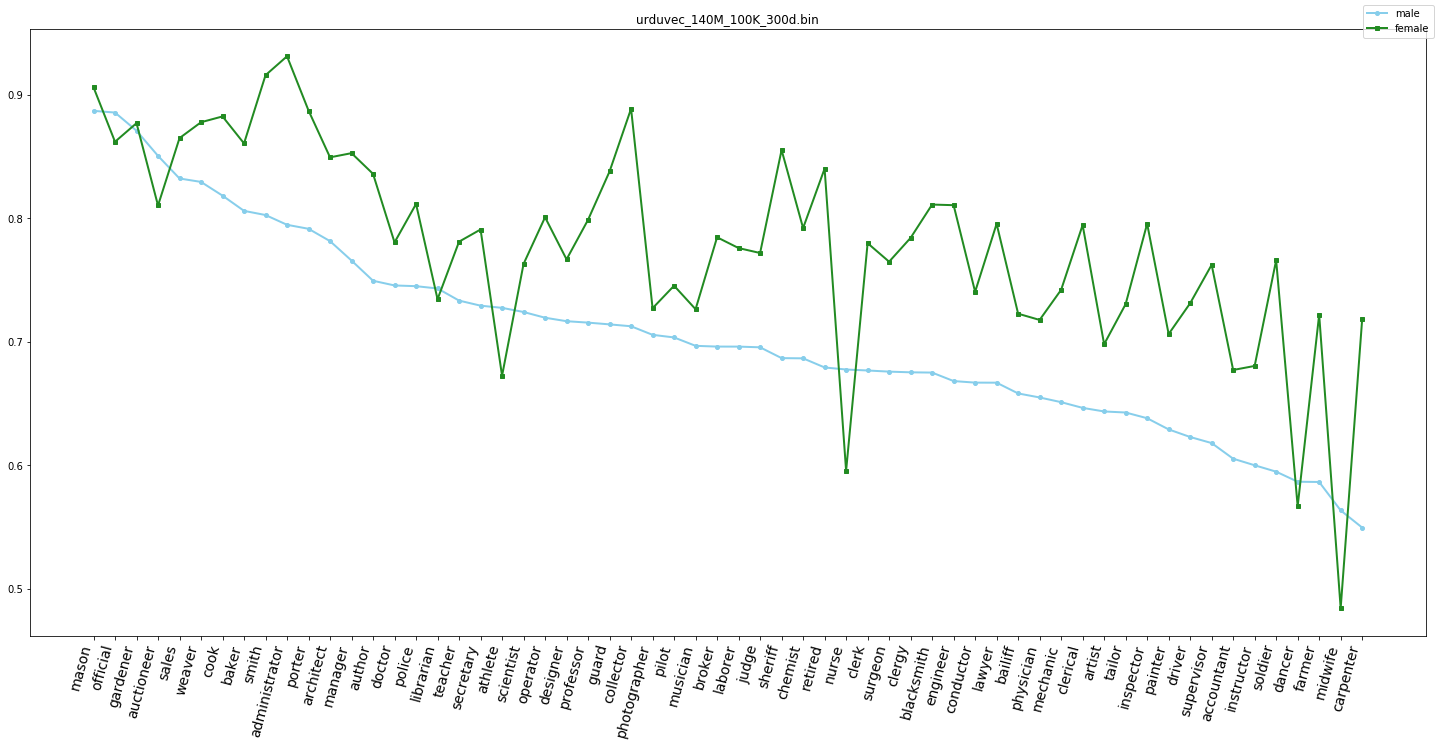

total 16 missing words for this embedding {'ماہر نفسیات', 'پوسٹ ماسٹر', 'جینیٹر', 'طبیعیات دان', 'ریاضی دان', 'ماہر ارضیات', 'کیشئیر', 'گھریلو ملازم', 'نااخت', 'طالب علم', 'دانتوں کا ڈاکٹر', 'ماہر معاشیات', 'شماریات دان', 'سرویئر', 'جوتا بنانے والا', 'حاضر خدمت'}



target group -->
professional_occupation ['দারোয়ান', 'পরিসংখ্যানবিদ', 'মিডওয়াইফ', 'বেলিফ', 'নিলাম', 'ফটোগ্রাফার', 'ভূতত্ত্ববিদ', 'জুতো প্রস্তুতকারক', 'অ্যাথলেট', 'ক্যাশিয়ার', 'নর্তকী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'উদ্যানবিদ', 'দাঁতের', 'তাঁতি', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'যান্ত্রিক', 'শ্রমিক', 'পোস্টমাস্টার', 'ব্রোকার', 'রসায়নবিদ', 'গ্রন্থাগারিক', 'পরিচারক', 'কেরানি', 'সুরকার', 'কুলি', 'বিজ্ঞানী', 'ছুতার', 'নাবিক', 'প্রশিক্ষক', 'শেরিফ', 'পাইলট', 'পরিদর্শক', 'রাজমিস্ত্রি', 'বেকার', 'প্রশাসক', 'স্থপতি', 'সংগ্রাহক', 'অপারেটর', 'সার্জন', 'চালক', 'চিত্রশিল্পী', 'কন্ডাক্টর', 'নার্স', 'কুক', 'ইঞ্জিনিয়ার', 'অবসরপ্রাপ্ত', 'বিক্রয়', 'আইনজীবী', 'প

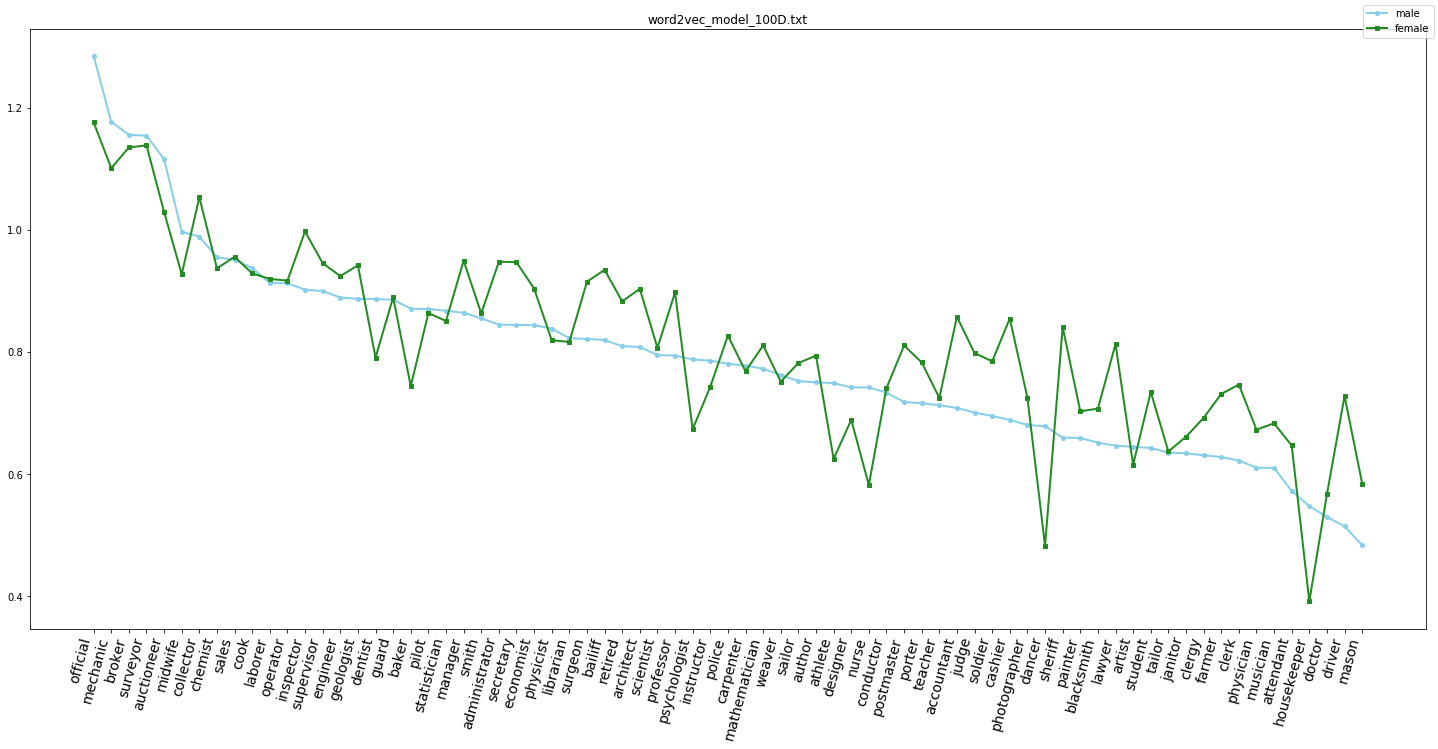

total 2 missing words for this embedding {'উদ্যানবিদ', 'জুতো প্রস্তুতকারক'}





In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    lang_name = embedding_name.split('.')[0]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    if embedding_name.split('.')[-1] == 'bin':
        model = KeyedVectors.load_word2vec_format(filename, binary=True)
    else:
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)

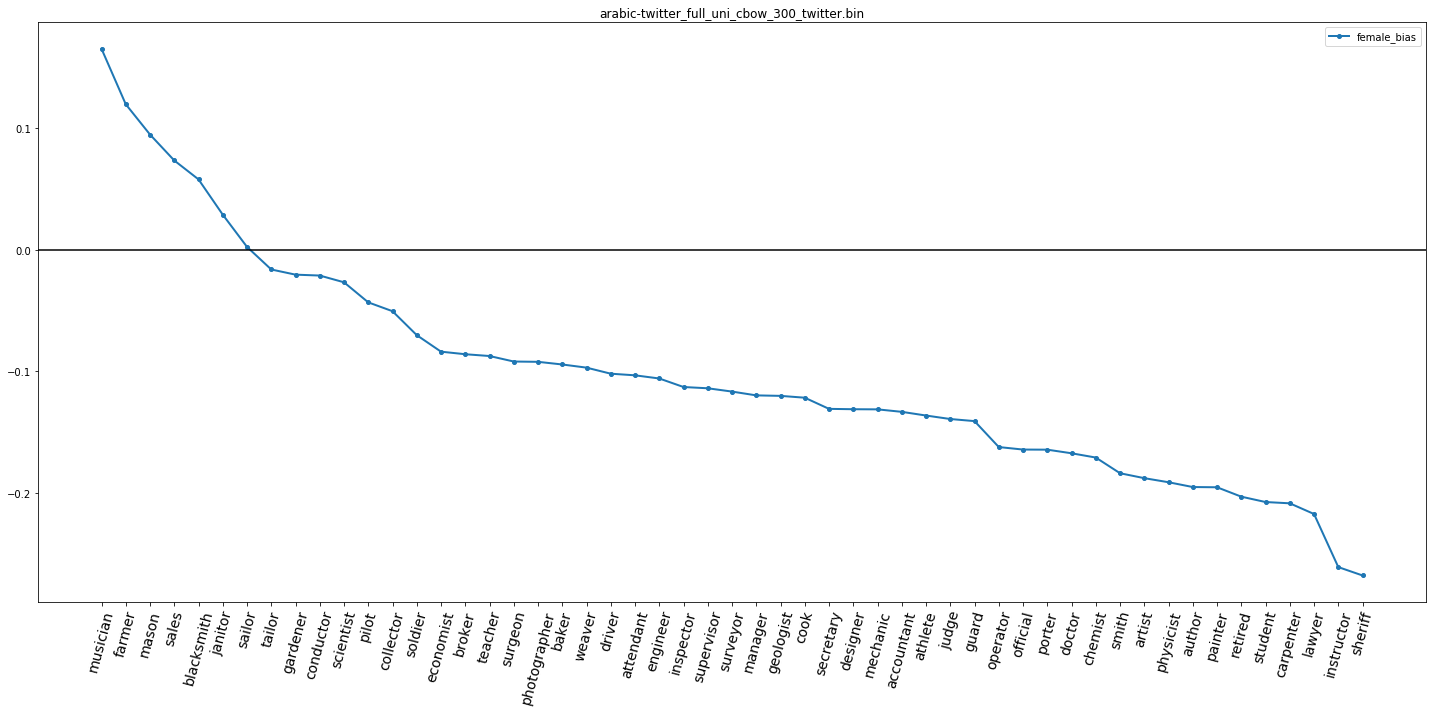

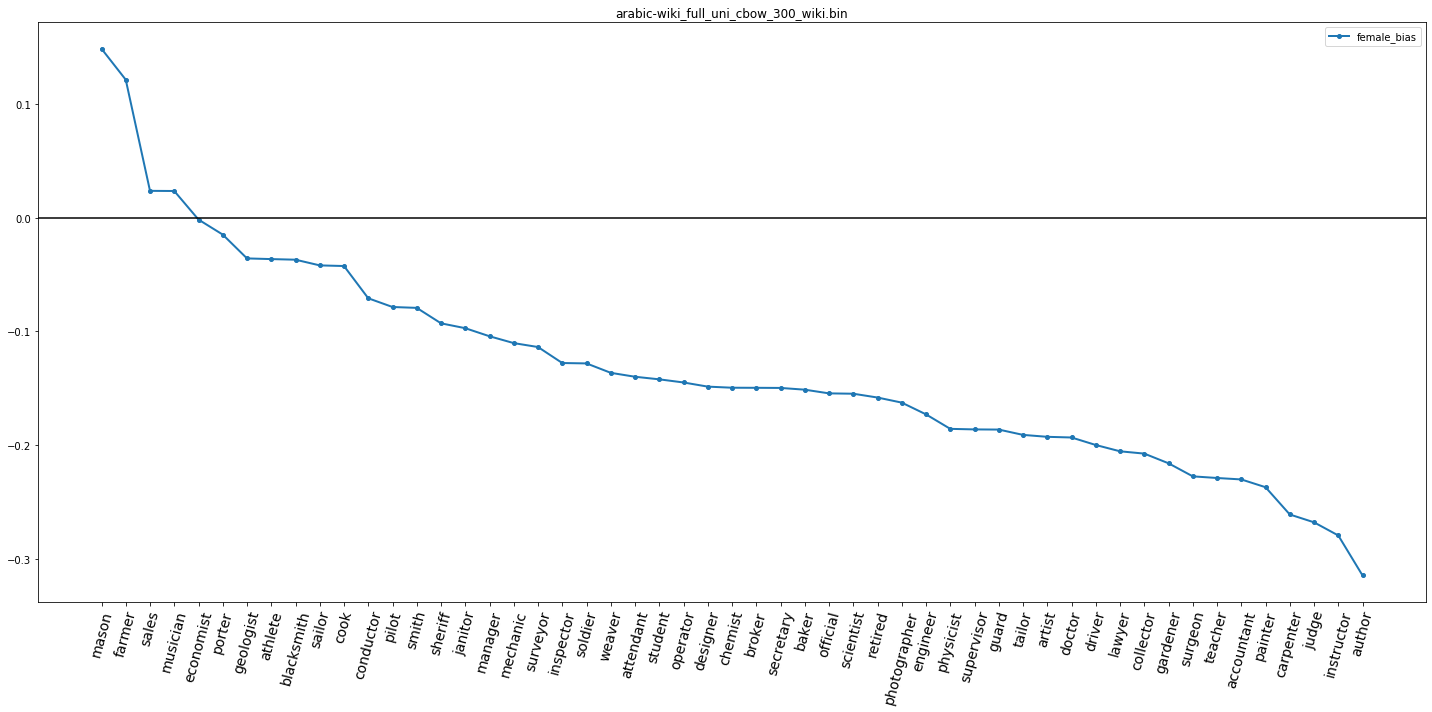

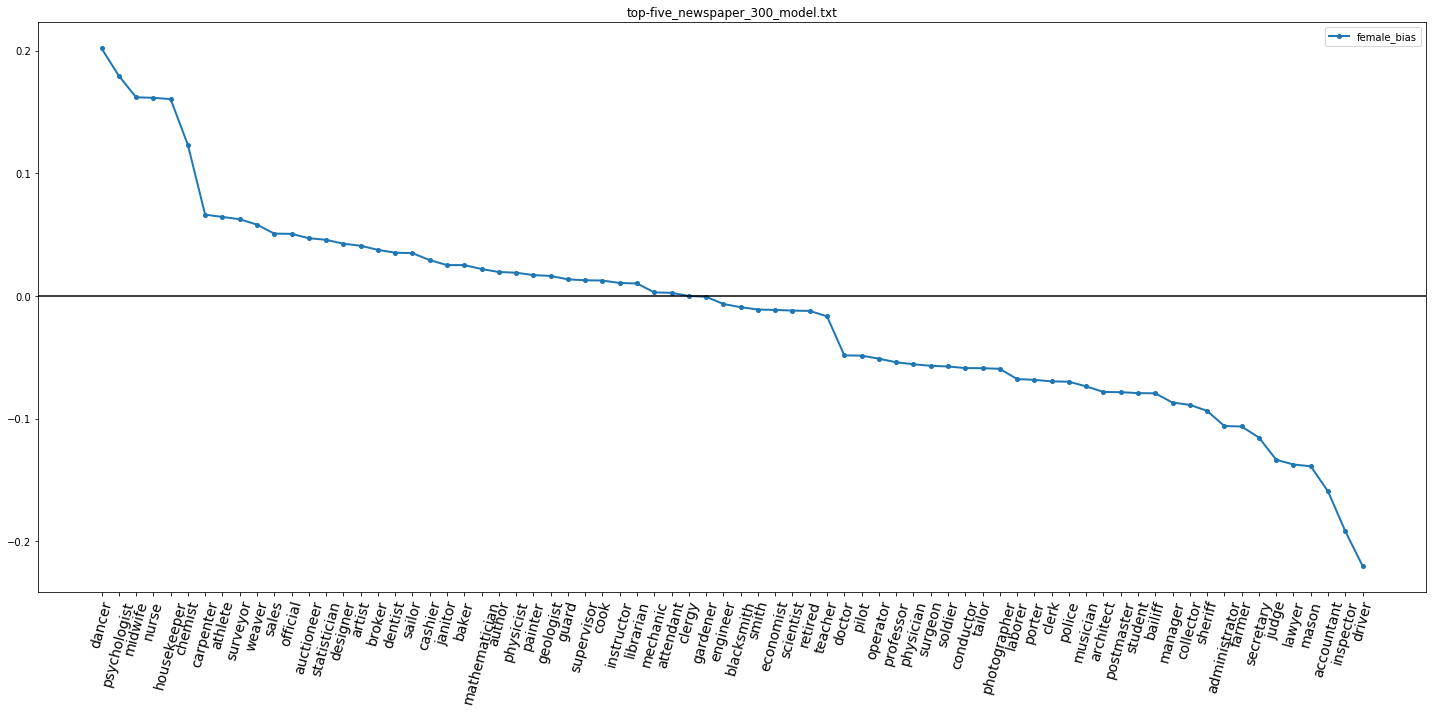

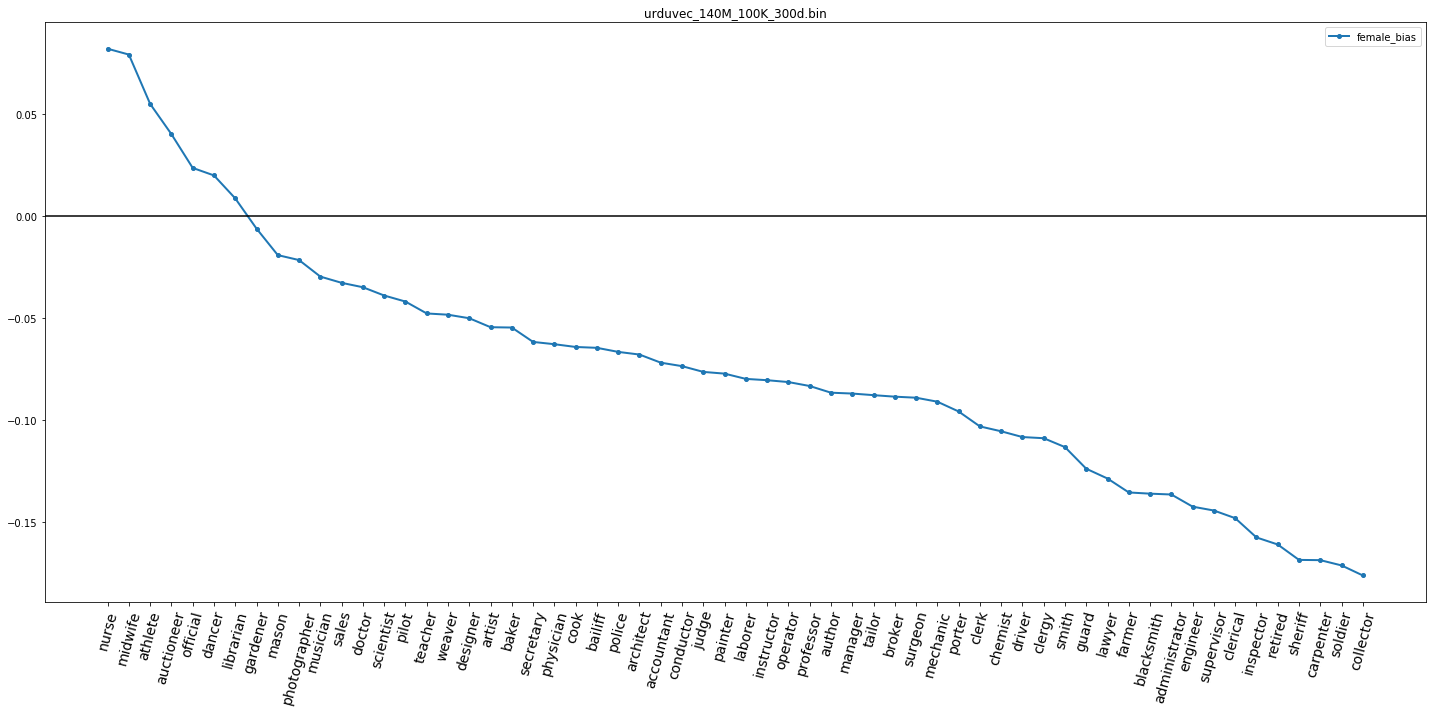

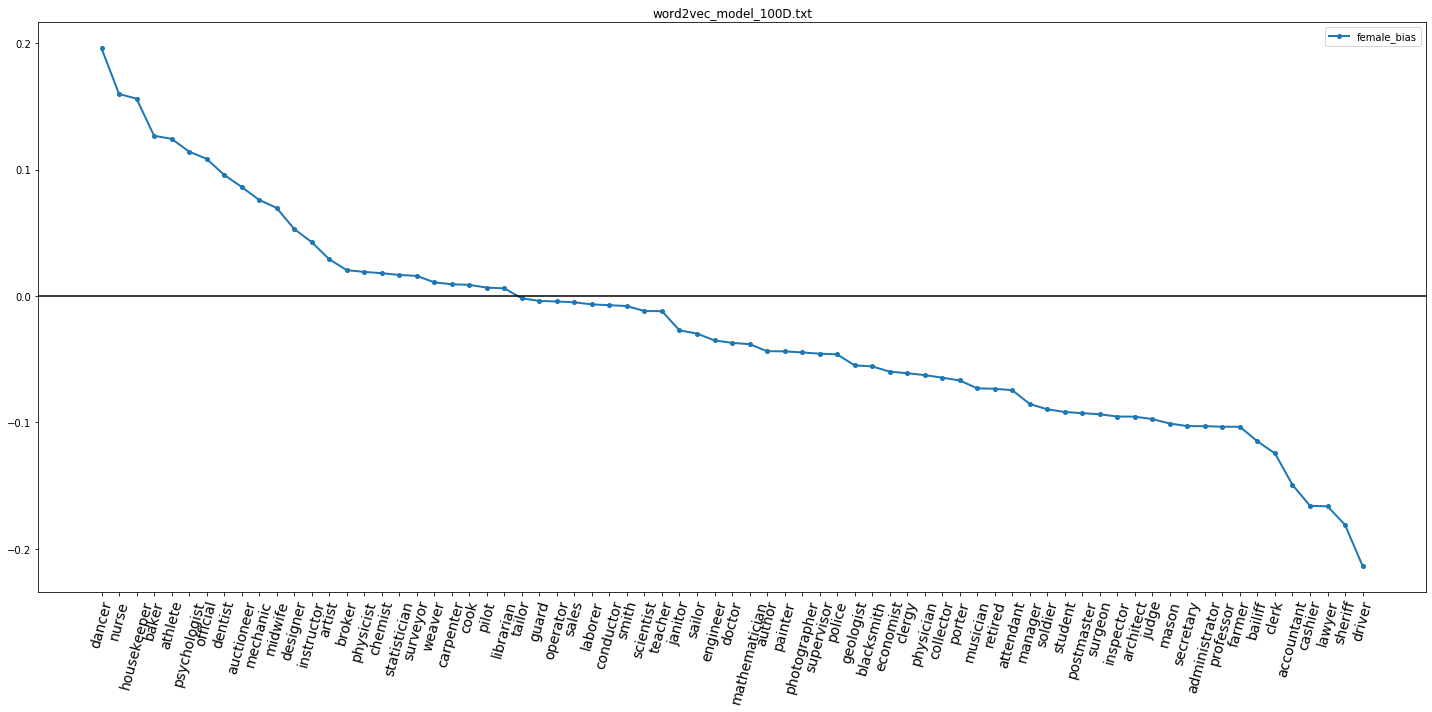

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

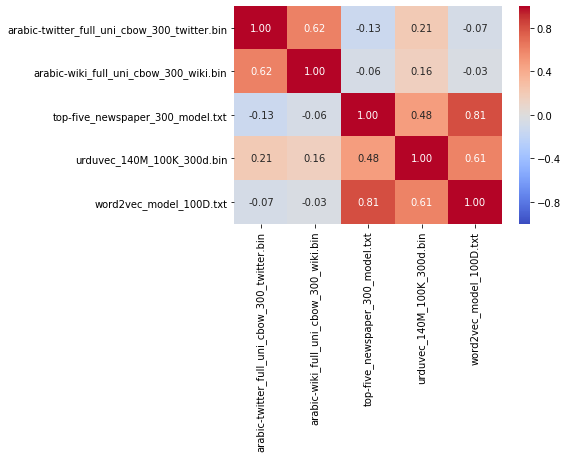

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)